In [1]:
    
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.feature_selection import GenericUnivariateSelect, chi2, f_classif
from sklearn.model_selection import train_test_split,  GroupShuffleSplit
import pathlib
from datetime import datetime
import os

In [2]:
!pwd

/data/shpx/notebooks/olivyatan/Unbiasing


#### Data of piyi v7 multilabel unbiased run: 

In [ ]:
import pickle
import numpy as np

import pandas as pd
# link od model run: https://github.ebay.com/olivyatan/treeplex/tree/krylov_week07_20230213180248_Monday/htmls/piyi_v7_unbiased 
file = open(f'/data/shpx/data/olivyatan/week07_20230213180248_Monday/prep/piyi_v7_unbiased_prepped_data', 'rb')
# dump information to that file
prepped_data = pickle.load(file)
file.close()

In [ ]:
!ls  /data/shpx/data/olivyatan/
# to see model run": week07_20230213180248_Monday 

In [16]:
!ls  /data/shpx/data/olivyatan/week07_20230213180248_Monday/prep/piyi_v7_unbiased_prepped_data
#location of the rin itself

/data/shpx/data/olivyatan/week07_20230213180248_Monday/prep/piyi_v7_unbiased_prepped_data


In [17]:
!ls  /data/shpx/data/olivyatan//week07_20230213180248_Monday/simplex_models/

calibration_params.json
simplex_piyi_v7_unbiased_week07_20230213165511_Monday.pkl
simplex_piyi_v7_unbiased_week07_20230213165511_Monday.pkl_parameters.log


#### Data of piyi v7 biased:

In [18]:
!ls  /data/shpx/data/olivyatan/week07_20230213175714_Monday/simplex_models/simplex_piyi_v7_week07_20230213163652_Monday.pkl

/data/shpx/data/olivyatan/week07_20230213175714_Monday/simplex_models/simplex_piyi_v7_week07_20230213163652_Monday.pkl


In [8]:
!ls  /data/shpx/data/olivyatan/week07_20230213175714_Monday/prep/piyi_v7_prepped_data

/data/shpx/data/olivyatan/week07_20230213175714_Monday/prep/piyi_v7_prepped_data


In [ ]:
rsync -avzh --progress kry45:/data/shpx/data/olivyatan/week07_20230213180248_Monday/simplex_models/simplex_piyi_v7_week07_20230213163652_Monday.pkl .


##### Data of piyi v7: 

In [1]:
import pickle
import numpy as np

import pandas as pd
# link of piyi v7 multilabel model run: https://github.ebay.com/olivyatan/treeplex/tree/krylov_week07_20230213175714_Monday/htmls/piyi_v7
file = open(f'/data/shpx/data/olivyatan/week07_20230213175714_Monday/prep/piyi_v7_prepped_data', 'rb')
# dump information to that file
prepped_data_v7 = pickle.load(file)
file.close()

In [2]:
prepped_data_v7

In [3]:
np.unique(prepped_data_v7.y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([1665778,  242473,   14370,    2290,     354,     124,    2224]))

In [4]:
np.unique(prepped_data.y_test, return_counts=True)

NameError: name 'prepped_data' is not defined

In [10]:
dir(prepped_data)

['X_test',
 'X_test_for_calibration',
 'X_test_sample_weight',
 'X_test_sample_weight_eval',
 'X_train',
 'X_train_sample_weight',
 'X_train_sample_weight_eval',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'apply_column_filters',
 'apply_data_filters',
 'apply_filters',
 'compute_event_rate',
 'compute_multi_label_event_rate',
 'construct_label_array',
 'event_rate',
 'extract_schema',
 'extract_weights',
 'filter_examples',
 'force_contiguous',
 'get_eval_weights',
 'get_event_rates',
 'get_label_column',
 'group_hold_out',
 'group_train',
 'hold_out',
 'mem_usage',
 'raw_event_rate',
 'sample_data',
 'schema',
 'set_click_propensities',
 'set_up_logger',
 'split_

In [37]:
prepped_data.mem_usage

5850216184

In [39]:
prepped_data.X_test_sample_weight

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [43]:
np.unique(prepped_data.X_test_sample_weight)

array([ 0.420534  ,  0.5568509 ,  0.63525075,  0.63771963,  0.6405908 ,
        0.6932791 ,  0.7818593 ,  0.82777905,  0.87078625,  0.88848084,
        0.9129124 ,  0.9153468 ,  0.933552  ,  0.9442985 ,  0.9458925 ,
        0.94967794,  0.9522477 ,  0.9545896 ,  0.955105  ,  0.9586939 ,
        0.95942634,  0.9636964 ,  0.96699977,  0.9703532 ,  0.9775687 ,
        0.97761095,  0.9984952 ,  1.        ,  1.0170945 ,  1.0385801 ,
        1.0407873 ,  1.0512642 ,  1.0711716 ,  1.0857247 ,  1.0946076 ,
        1.1048454 ,  1.1054703 ,  1.1068069 ,  1.1071949 ,  1.113889  ,
        1.1227758 ,  1.1443181 ,  1.15719   ,  1.1657927 ,  1.1696985 ,
        1.1827197 ,  1.1941738 ,  1.222866  ,  1.3013855 ,  1.4192955 ,
        1.4381298 ,  1.5118873 ,  1.5607082 ,  1.5731978 ,  1.5907905 ,
        1.7094122 ,  1.7464522 ,  1.7751218 ,  1.8270276 ,  1.8280367 ,
        1.8292229 ,  1.9262638 ,  1.9875515 ,  2.0004961 ,  2.021212  ,
        2.040895  ,  2.0515463 ,  2.0699894 ,  2.073404  ,  2.11

In [5]:
prepped_data_v7.X_test.shape

(1927613, 33)

In [18]:
prepped_data_v7.X_test

array([[-1.0000000e+00,  0.0000000e+00,  1.0000000e+00, ...,
         1.1314000e+00,  4.3553287e-01,  3.5304301e-03],
       [ 3.6000000e+01,  0.0000000e+00,  1.0000000e+00, ...,
         1.1314000e+00,  4.1683534e-01,  1.1900325e-03],
       [-1.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         4.4079890e+00,  3.8878092e-01,  6.3282140e-03],
       ...,
       [-1.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.6638179e+00,  5.3148097e-01,  1.6254800e-03],
       [-1.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         6.2395592e+01,  2.5451079e-01,  2.1900672e-04],
       [-1.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.8500128e+00,  6.6429996e-01,  4.5146429e-05]], dtype=float32)

In [6]:
prepped_data_v7.hold_out

{'meid': array([b'0cec9e13a1c141b08aeb4ca7d5596a14',
        b'0cec9e13a1c141b08aeb4ca7d5596a14',
        b'0cec9e13a1c141b08aeb4ca7d5596a14', ...,
        b'fefde91be44b4784be093c449ab3ab08',
        b'fefde91be44b4784be093c449ab3ab08',
        b'fefde91be44b4784be093c449ab3ab08'], dtype='|S32'),
 'mlrRank': array([ 1,  2,  3, ...,  8,  9, 10], dtype=int32),
 'itemId': array([115678469197, 374462622985, 266086094810, ..., 254718769805,
        265119219763, 144392466437]),
 'labels.labelClassicBBE': array([-1, -1, -1, ..., -1, -1, -1], dtype=int32)}

In [7]:
pdf = pd.DataFrame( prepped_data_v7.hold_out)

In [8]:
pdf.shape

(1927613, 4)

In [9]:
pdf

,meid,mlrRank,itemId,labels.labelClassicBBE
0,b'0cec9e13a1c141b08aeb4ca7d5596a14',1,115678469197,-1
1,b'0cec9e13a1c141b08aeb4ca7d5596a14',2,374462622985,-1
2,b'0cec9e13a1c141b08aeb4ca7d5596a14',3,266086094810,-1
3,b'0cec9e13a1c141b08aeb4ca7d5596a14',4,144902273166,-1
4,b'0cec9e13a1c141b08aeb4ca7d5596a14',5,155367956001,-1
...,...,...,...,...
1927608,b'fefde91be44b4784be093c449ab3ab08',6,165354597804,-1
1927609,b'fefde91be44b4784be093c449ab3ab08',7,263946447162,-1
1927610,b'fefde91be44b4784be093c449ab3ab08',8,254718769805,-1
1927611,b'fefde91be44b4784be093c449ab3ab08',9,265119219763,-1


In [13]:
prepped_data_v7.hold_out['meid'][:10]

array([b'0cec9e13a1c141b08aeb4ca7d5596a14',
       b'0cec9e13a1c141b08aeb4ca7d5596a14',
       b'0cec9e13a1c141b08aeb4ca7d5596a14',
       b'0cec9e13a1c141b08aeb4ca7d5596a14',
       b'0cec9e13a1c141b08aeb4ca7d5596a14',
       b'0cec9e13a1c141b08aeb4ca7d5596a14',
       b'0cec9e13a1c141b08aeb4ca7d5596a14',
       b'0cec9e13a1c141b08aeb4ca7d5596a14',
       b'0cec9e13a1c141b08aeb4ca7d5596a14',
       b'0cec9e13a1c141b08aeb4ca7d5596a14'], dtype='|S32')

In [14]:
prepped_data_v7.hold_out['itemId']

array([115678469197, 374462622985, 266086094810, ..., 254718769805,
       265119219763, 144392466437])

In [23]:
prepped_data.hold_out['itemId']

array([115678469197, 374462622985, 266086094810, ..., 254718769805,
       265119219763, 144392466437])

### mlrRank is original production model rank: 

In [15]:
prepped_data_v7.hold_out['mlrRank'][:40]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10], dtype=int32)

In [26]:
prepped_data.hold_out['mlrRank'][:40]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10], dtype=int32)

#### Piyi v7 biased model: 

In [16]:
import xgboost
piyiv7_bias_model = xgboost.Booster()

In [17]:
piyiv7_bias_model.load_model('piyiV7_biased.bst')

[12:19:05] WARNING: ../src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


### Unbiased ranking- load model:

In [2]:
import xgboost

In [3]:
unbiased_model = xgboost.Booster()
unbiased_model.load_model('simplex_piyi_v7_unbiased.bst')

[10:58:38] WARNING: ../src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


In [12]:
xgb_model_loaded

NameError: name 'xgb_model_loaded' is not defined

In [20]:
y_pred = xgb_model_loaded.predict(xgboost.DMatrix(prepped_data.X_test))

In [21]:
y_pred

array([ 0.58596784, -0.14937016,  0.36867687, ..., -1.1259544 ,
       -0.6990923 , -1.2575393 ], dtype=float32)

In [48]:
prepped_data.y_test

array([0, 1, 0, ..., 1, 0, 0], dtype=int32)

In [49]:
np.unique(prepped_data.y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([1665778,  242473,   14370,    2290,     354,     124,    2224]))

In [2]:
pdf.shape

NameError: name 'pdf' is not defined

In [4]:
2224/1927613 *100

0.11537585604579341

In [23]:
pdf['y_pred'] = y_pred

In [22]:
pdf['label'] = prepped_data.y_test

In [24]:
pdf['rank_unbiased'] = pdf.groupby('meid')['y_pred'].rank(method='dense', ascending=False)

In [41]:
pdf['X_test_sample_weight'] =prepped_data.X_test_sample_weight

In [44]:
pdf['X_test_sample_weight_eval'] =prepped_data.X_test_sample_weight_eval

In [45]:
pdf.head(12)

,meid,mlrRank,itemId,labels.labelClassicBBE,label,y_pred,rank_unbiased,X_test_sample_weight,X_test_sample_weight_eval
0,b'06c811dbcf3f4e8492ec13ad4943baa8',1,165886259355,-1,0,0.585968,1.0,1.0,1.0
1,b'06c811dbcf3f4e8492ec13ad4943baa8',2,304758681643,-1,1,-0.149370,6.0,1.0,1.0
2,b'06c811dbcf3f4e8492ec13ad4943baa8',3,255926583975,-1,0,0.368677,3.0,1.0,1.0
3,b'06c811dbcf3f4e8492ec13ad4943baa8',4,334688356602,-1,0,0.281479,4.0,1.0,1.0
4,b'06c811dbcf3f4e8492ec13ad4943baa8',5,185737193566,-1,0,0.395501,2.0,1.0,1.0
5,b'06c811dbcf3f4e8492ec13ad4943baa8',6,175113651756,-1,0,-0.480952,8.0,1.0,1.0
6,b'06c811dbcf3f4e8492ec13ad4943baa8',7,225346357937,-1,0,-0.060489,5.0,1.0,1.0
7,b'06c811dbcf3f4e8492ec13ad4943baa8',8,404107077467,-1,0,-0.259329,7.0,1.0,1.0
8,b'06c811dbcf3f4e8492ec13ad4943baa8',9,374460874585,-1,0,-1.041139,10.0,1.0,1.0
9,b'06c811dbcf3f4e8492ec13ad4943baa8',10,165423822921,-1,0,-0.874499,9.0,1.0,1.0


In [46]:
pdf[pdf['meid']==b'0cec9e13a1c141b08aeb4ca7d5596a14']

,meid,mlrRank,itemId,labels.labelClassicBBE,label,y_pred,rank_unbiased,X_test_sample_weight,X_test_sample_weight_eval
834728,b'0cec9e13a1c141b08aeb4ca7d5596a14',1,115678469197,-1,1,1.308024,1.0,1.0,1.0
834729,b'0cec9e13a1c141b08aeb4ca7d5596a14',2,374462622985,-1,0,0.375601,3.0,1.0,1.0
834730,b'0cec9e13a1c141b08aeb4ca7d5596a14',3,266086094810,-1,0,-0.555214,7.0,1.0,1.0
834731,b'0cec9e13a1c141b08aeb4ca7d5596a14',4,144902273166,-1,0,-0.494656,6.0,1.0,1.0
834732,b'0cec9e13a1c141b08aeb4ca7d5596a14',5,155367956001,-1,0,0.351475,4.0,1.0,1.0
834733,b'0cec9e13a1c141b08aeb4ca7d5596a14',6,115678475424,-1,0,0.459016,2.0,1.0,1.0
834734,b'0cec9e13a1c141b08aeb4ca7d5596a14',7,295480888789,-1,0,-0.226427,5.0,1.0,1.0
834735,b'0cec9e13a1c141b08aeb4ca7d5596a14',8,195556704575,-1,0,-0.783052,8.0,1.0,1.0
834736,b'0cec9e13a1c141b08aeb4ca7d5596a14',9,295471863277,-1,0,-0.975719,9.0,1.0,1.0
834737,b'0cec9e13a1c141b08aeb4ca7d5596a14',10,115675587641,-1,0,-1.121641,10.0,1.0,1.0


In [47]:
pdf[pdf['meid']==b'26d706d1cb9b40cf9476c08ebd8bd71f']

,meid,mlrRank,itemId,labels.labelClassicBBE,label,y_pred,rank_unbiased,X_test_sample_weight,X_test_sample_weight_eval
834738,b'26d706d1cb9b40cf9476c08ebd8bd71f',1,364110762823,-1,0,1.786796,2.0,1.0,1.0
834739,b'26d706d1cb9b40cf9476c08ebd8bd71f',2,255927604073,-1,1,1.850591,1.0,1.0,1.0
834740,b'26d706d1cb9b40cf9476c08ebd8bd71f',3,155358911175,-1,0,1.156294,4.0,1.0,1.0
834741,b'26d706d1cb9b40cf9476c08ebd8bd71f',4,175579126514,-1,0,1.624009,3.0,1.0,1.0
834742,b'26d706d1cb9b40cf9476c08ebd8bd71f',5,334703276016,-1,0,1.020187,7.0,1.0,1.0
834743,b'26d706d1cb9b40cf9476c08ebd8bd71f',6,285110446900,-1,0,1.044926,6.0,1.0,1.0
834744,b'26d706d1cb9b40cf9476c08ebd8bd71f',7,285110445252,-1,0,0.788763,8.0,1.0,1.0
834745,b'26d706d1cb9b40cf9476c08ebd8bd71f',8,285111182018,-1,0,1.089282,5.0,1.0,1.0
834746,b'26d706d1cb9b40cf9476c08ebd8bd71f',9,285110445903,-1,0,0.635191,10.0,1.0,1.0
834747,b'26d706d1cb9b40cf9476c08ebd8bd71f',10,334704419504,-1,0,0.661216,9.0,1.0,1.0


In [58]:
pdf.meid.nunique()

199685

In [59]:
pdf_rank12.meid.nunique()

199677

In [56]:
pdf_rank12=pdf[pdf['mlrRank'].isin([1, 2])].copy()

In [57]:
pdf_rank12['ranks_are_equal'] = pdf_rank12.apply(lambda x: int(x['mlrRank'] ==x['rank_unbiased']), axis=1)

In [62]:
pdf_rank12.head(10)

,meid,mlrRank,itemId,labels.labelClassicBBE,label,y_pred,rank_unbiased,X_test_sample_weight,X_test_sample_weight_eval,ranks_are_equal
0,b'06c811dbcf3f4e8492ec13ad4943baa8',1,165886259355,-1,0,0.585968,1.0,1.0,1.0,1
1,b'06c811dbcf3f4e8492ec13ad4943baa8',2,304758681643,-1,1,-0.149370,6.0,1.0,1.0,0
10,b'07ce1dd8391e449589b84356ce60178d',1,325491413337,-1,1,0.491914,1.0,1.0,1.0,1
11,b'07ce1dd8391e449589b84356ce60178d',2,125317339557,-1,0,-2.507590,7.0,1.0,1.0,0
20,b'0da344690f6c4d879a6dba876a188827',1,285081438854,-1,0,-1.287927,1.0,1.0,1.0,1
21,b'0da344690f6c4d879a6dba876a188827',2,324743689465,-1,1,-1.378467,2.0,1.0,1.0,1
30,b'12fecb0f78154b42bea3da5f19eecb48',1,334700341142,-1,1,-1.095907,1.0,1.0,1.0,1
31,b'12fecb0f78154b42bea3da5f19eecb48',2,403905220516,-1,0,-1.156610,2.0,1.0,1.0,1
39,b'157c5be3ad5a41ffbec181f5134a0610',1,224329520602,-1,0,0.286346,8.0,1.0,1.0,0
40,b'157c5be3ad5a41ffbec181f5134a0610',2,124794465889,-1,0,0.510239,3.0,1.0,1.0,0


In [135]:
pdf_rank12[['meid','itemId','mlrRank', 'y_pred','rank_unbiased','ranks_are_equal']].head(10)

,meid,itemId,mlrRank,y_pred,rank_unbiased,ranks_are_equal
0,b'06c811dbcf3f4e8492ec13ad4943baa8',165886259355,1,0.585968,1.0,1
1,b'06c811dbcf3f4e8492ec13ad4943baa8',304758681643,2,-0.149370,6.0,0
10,b'07ce1dd8391e449589b84356ce60178d',325491413337,1,0.491914,1.0,1
11,b'07ce1dd8391e449589b84356ce60178d',125317339557,2,-2.507590,7.0,0
20,b'0da344690f6c4d879a6dba876a188827',285081438854,1,-1.287927,1.0,1
21,b'0da344690f6c4d879a6dba876a188827',324743689465,2,-1.378467,2.0,1
30,b'12fecb0f78154b42bea3da5f19eecb48',334700341142,1,-1.095907,1.0,1
31,b'12fecb0f78154b42bea3da5f19eecb48',403905220516,2,-1.156610,2.0,1
39,b'157c5be3ad5a41ffbec181f5134a0610',224329520602,1,0.286346,8.0,0
40,b'157c5be3ad5a41ffbec181f5134a0610',124794465889,2,0.510239,3.0,0


In [67]:
pdf_rank_equal=pdf_rank12.groupby('meid')['ranks_are_equal'].sum().to_frame().reset_index()

In [70]:
pdf_rank_equal.shape

(199677, 2)

In [69]:
pdf_rank_equal.head(10)

,meid,ranks_are_equal
0,b'0000265fbd7a44aca48a906adeff8875',1
1,b'00040e543b0546ccb0a22e0cc20175de',2
2,b'000e0759753843e18ab6c20a768cc399',0
3,b'000e0d9eea8842ebacbc9de0879b1e95',1
4,b'00124e66895343c196fdbd4666f02374',0
5,b'0012aeb60dc24886b2a9a46e1ed04916',1
6,b'0013f8f576d64cc9a6da1124e2aba5e4',1
7,b'0014c18b15524ea5b0e5e58f45664ef6',0
8,b'0015258cd13c41c69b951cd2cc21acfa',0
9,b'001539fc62994c47ad0ea5ec01142273',1


In [71]:
pdf_rank_equal[pdf_rank_equal['ranks_are_equal']==2].shape

(49487, 2)

In [72]:
pdf_rank_equal[pdf_rank_equal['ranks_are_equal']==1].shape

(71737, 2)

In [73]:
49487/199677

0.2478352539351052

In [74]:
71737/199677

0.359265213319511

In [78]:
purchase=pdf[pdf['label']==6]

In [153]:
purchase['rank_change_purchase']=purchase['mlrRank']-purchase['rank_unbiased']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
purchase.shape

(2224, 9)

In [110]:
purchase.meid.nunique()

2207

In [157]:
purchase[['meid','itemId','label','mlrRank', 'y_pred','rank_unbiased','rank_change_purchase']]

,meid,itemId,label,mlrRank,y_pred,rank_unbiased,rank_change_purchase
1172,b'c58b1e79dfd943f381d7366c419a319e',165487744403,6,6,-0.398481,3.0,3.0
3305,b'b33d607410444938b598fd20ca6c70a5',304764435518,6,1,1.090774,2.0,-1.0
3872,b'736582f5fc674b169548c9f547f444b2',204144864985,6,2,0.727310,2.0,0.0
3873,b'736582f5fc674b169548c9f547f444b2',155138650725,6,3,0.230287,9.0,-6.0
3924,b'91394c358a7348ec8cd2ff277c2512c4',304598665996,6,6,1.563599,3.0,3.0
...,...,...,...,...,...,...,...
1926881,b'2b925d1c8b2b43e18f6400e2cce9669c',195553112917,6,1,0.972419,3.0,-2.0
1926981,b'919e4b442f6542b8949d5b8e0ce9f329',266066042485,6,1,3.371333,1.0,0.0
1927022,b'c55cb045e35e4b9dab6fd3c0088e8cdf',404089083269,6,2,1.439514,1.0,1.0
1927256,b'a3d3c940727b493da34d09a6d696d268',324858378745,6,2,-1.463149,5.0,-3.0


In [167]:
743/2220

0.3346846846846847

In [162]:
purchase[purchase['rank_change_purchase']>0].shape

(743, 10)

In [174]:
purchase[purchase['rank_change_purchase']>0]\
[['meid','itemId','label','mlrRank','rank_unbiased','rank_change_purchase']].head(10)

,meid,itemId,label,mlrRank,rank_unbiased,rank_change_purchase
1172,b'c58b1e79dfd943f381d7366c419a319e',165487744403,6,6,3.0,3.0
3924,b'91394c358a7348ec8cd2ff277c2512c4',304598665996,6,6,3.0,3.0
5529,b'fe5e0701fe9048d49c2e7a8c828734d3',284195835955,6,9,7.0,2.0
7880,b'd8c40998337c436981a787650e4d452b',175554344306,6,2,1.0,1.0
9102,b'ea525e450ed9431890b140dd615dca51',394413695428,6,4,1.0,3.0
10179,b'485dfe4bf60a4350b39afaf5fb231806',394355380109,6,2,1.0,1.0
17878,b'a287e86360544edfbd54a779aefe0e5a',182707960943,6,2,1.0,1.0
19371,b'd0db30b0b5494b4dafccab4e5e994f05',144843204263,6,7,3.0,4.0
21821,b'830044e2b7434b4d83310d982254141e',284317217035,6,5,1.0,4.0
24738,b'a1afe2d36ef345d3ae667329b70e0cd7',392975715412,6,5,1.0,4.0


In [164]:
purchase[purchase['rank_change_purchase']>0]['rank_change_purchase'].mean()

2.6971736204576042

In [172]:
purchase[purchase['rank_change_purchase']>0]['rank_change_purchase'].quantile(0.5)

2.0

In [121]:
purchase_rank=purchase.groupby('mlrRank')['label'].count().to_frame().reset_index() 

In [122]:
purchase_rank.sum()

mlrRank     154
label      2224
dtype: int64

In [123]:
purchase_rank=purchase_rank[purchase_rank['mlrRank']<=10].copy()

In [132]:
purchase[purchase['mlrRank']<=10].meid.nunique()

2204

In [133]:
purchase_rank.sum()

mlrRank                        55.0
label                        2220.0
%purchases                    100.0
%cumulative_sum_purchases     816.0
dtype: float64

In [125]:
purchase_rank['%purchases']=(purchase_rank['label']/purchase_rank['label'].sum()*100).round(0)

In [126]:
purchase_rank['%cumulative_sum_purchases']=purchase_rank['%purchases'].cumsum()

In [127]:
purchase_rank

,mlrRank,label,%purchases,%cumulative_sum_purchases
0,1,928,42.0,42.0
1,2,497,22.0,64.0
2,3,196,9.0,73.0
3,4,156,7.0,80.0
4,5,117,5.0,85.0
5,6,81,4.0,89.0
6,7,72,3.0,92.0
7,8,53,2.0,94.0
8,9,64,3.0,97.0
9,10,56,3.0,100.0


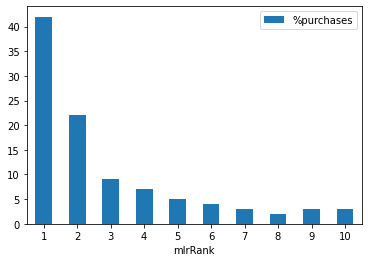

In [128]:
ax = purchase_rank.plot.bar(x='mlrRank', y='%purchases', rot=0)

In [148]:
rank_change_purchase=purchase['mlrRank']-purchase['rank_unbiased']

In [150]:
rank_change_purchase

1172       3.0
3305      -1.0
3872       0.0
3873      -6.0
3924       3.0
          ... 
1926881   -2.0
1926981    0.0
1927022    1.0
1927256   -3.0
1927534    0.0
Length: 2224, dtype: float64

In [149]:
rank_change_purchase.mean()

0.44919064748201437

In [151]:
rank_change_purchase.quantile(0.5)

0.0

In [158]:
rank_change_purchase.quantile(0.75)

1.0

In [159]:
rank_change_purchase.quantile(0.95)

5.0